<a href="https://colab.research.google.com/github/AngelloDavincii/Data_Science_trackcourse_Summary/blob/main/CheatSheetDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description:
This is a jupyter notebook that tries to summarize all the concept seen
in the data science track on datacamp and complement this course with research, comments and other things that can be useful at the time of make a data analysis. The idea of this series of Jupyter notebooks is create a "cheat sheet" for the basics in each step of data science cycle.<br>



# 1. Manipulation of dataframes

In [ ]:
dataframe.info() #displays the names of colums and the types
dataframe.head() #displays the firts elements from dataframe
dataframe.describe() #displays basic statistics
dataframe.values #displays values in a two dimensional numpy array
dataframe.columns #displays columns names from dataframes 
dataframe.shape #number of columns and rows
data.columns = ["name1","name2","name3"] #rename columns
del data["column name"] # drop column

In [ ]:
# Set dataframe index

# It makes that this columns works like index
data = data.set_index("name")
# To make multiple columns work like index
data = data.set_index(["column1","column2"])
# Remove the index
data.reset_index(drop = True)

# change order from index
ordered = ["number1","number2"]
data.reindex(ordered)
# also you can reindex a dataframe with the index of another dataframe
data.reindex(datos.index).ffill()
#ffill() replace all the NaN values with something

In [ ]:
# Count unique values in column
print(df.column.value_counts())

# Express the counts as proportions
print(df.column.value_counts(normalize = True))

### 1.1 Subsetting dataframe (Multiple methods)

In [ ]:
# Subset dataframe by column
dogs[["breed","hight_cm"]]
# Filter some column with a conditional
dogs[dogs["height_cm"] > 60]
# Combining multiple conditions
dogs[(dogs["height_cm"] > 60) & (dogs["weight"] > 100)]
#subset using isin can filter a categorical column easily
is_black_or_brown = dogs["color"].isin(["Black","Brown"])
# or filter
dogs[dogs["color"].isin(["Black","Brown"])]
#sort by columns
dogs.sort_values(["weight_kg","height_cm"], ascending = False)

#sort by indexes
#important to put level
data.sort_index(level = ["column1","column2"], ascending = [True, False])

# add new columns to dataframe
data["new_column"] = data["old_column"] / 100

In [ ]:
# LOC subsetting
dogs.loc[["filter1","filter2"]]
data.loc[[("filter column1","filter2 column1 "),("filter1 column2","filter2 column2")]]

# Slicing data frame
# FIRST YOU NEED TO SORT THE DATAFRAME BY INDEX
data.loc["third row":"sixth row"]
data.loc[("first row","third row"):("fifth row", "eigth row")]
#slicing columns
data.loc[:,"first column":"tenth column"]
# slicing iloc
data.iloc[1:3 , 4:10]

### 1.2 Column basic stats

In [ ]:
data["dogs"].mean()  # get mean
data["dogs"].median()  # get median
data["dogs"].mode()  # get mode
data["dogs"].min()  # get min
data["dogs"].max()  # get max
data["dogs"].var()  # get variance
data["dogs"].std()  # get standard deviation
data["dogs"].sum()  # get sum
data["dogs"].quartile(param)  # get quartile PARAMETER receive the quartile that you want

# Also you can complement this functions with group by to quickly compare groups with stats
# groupby https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html 
data.groupby(["weight"]).mean() 

In [ ]:
# .agg method
#supposse that we create the following function
def quartile30(column):
    return column.quartile(30)
#now we can use the function like this
data["dogs"].agg(quartile30)
# you can pass more than one function
data["dogs"].agg([quartile30,np.mean, np.median,max,min])

In [ ]:
# Acumulative stats this can work with columns and rows setting parameter axis
# For more information about output or use check: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html 
data["dogs"].cumsum() # it sums row by row from a columns
data["dogs"].cummax() 
data["dogs"].cummix()
data["dogs"].cumprod()

### 1.3 Pivot tables and crosstab

In [ ]:
# pivot tables https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html 

table = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum, fill_value=0)
# Values are the green values 
# Index are like the categories or groupby columns
# Columns Also categorize the dataframe by the levels of this column

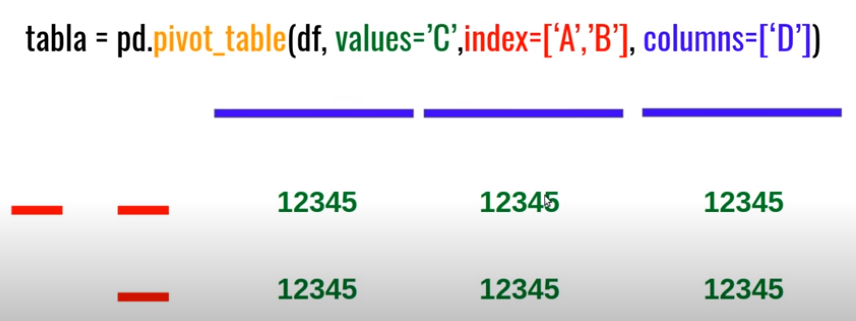

In [ ]:
# Some examples with other parameters

# Median is default function to summarize if you wanna use other specify it
data.pivot_table(values="a", index = "b", aggfunc = np.mean)
# If we want to group by another column we can specify the column
data.pivot_table(values="a", index = "b", columns="color",aggfunc = np.mean)
# To specify that for NaN values we want other thing specify fill_value
data.pivot_table(values="a", index = "b", columns="color", fill_value = 0, margin = True)
# Also this adds a column and row with the mean of each column and row without count the NaN values


In [ ]:
# EXAMPLE SUBSETTING BY DATES
# acces to year in column
date = data["date"].dt.year
# acces to month in column
date = data["date"].dt.month

# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperature

# Set date as an indexs_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)
temperatures_ind = temperatures.set_index("date")

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08":"2011-02"])

# 2. Plots

### 2.1 Seaborn
Basic plots

In [ ]:
#scatterplot
sns.scatterplot(x="xd",y="data")

#simple bar plot
sns.countplot(y="something")
# plot from data frame
sns.countplot(y="something", data = datos)
# distinct different colors based on column
sns.countplot(y="something", data = datos, hue = "Column", hue_order = ["Yes","No"], palette = hue_colors)
# you can personalize this color using 
hue_colors = {"Yes":"black","No":"red"} #after you call this dictionary with hue_colors

#subplots in columns 
sns.relplot(x = "something",y="column",kind = "scatter",data = datos,col = "column2")
#subplots in rows
sns.relplot(x = "something",y="column",kind = "scatter",data = datos,row = "column2")
#you can combine rows and columns

#to determine the number of graphs by column and the order:
#subplots in columns 
sns.relplot(x = "something",y="column",kind = "scatter",data = "dataframe",
           col = "column2",
          col_wrap = 3,
          size = "size", # chanze size from dots 
            hue = "size",# Change color according size from dots 
            style = "smoker", #change the style from the points
            alpha = 0.4, # transparency of the points 
            marker = True, #just for line plot marks the points that joins with lines
            dashes = False, #dont change the line style between groups
            ci = "sd" # shows the deviation from the points to the line, by default it shows an interval range
              #or it can be none
            col_order = ["Monday","Thursday","Friday"])


### 2.2 Customizing plots

In [ ]:
# customizing plots
sns.set_style("whitegrid") #add grid to plot
other styles available = ticks, dark, darkgrid

sns.set_palette("RdBu")

sns.set_context("paper","talk","poster","notebook")

# add labels and titles
g.fig.suptitle("Car Weight vs. Horsepower") # for relplot and catplot

g.set_title("Average MPG Over Time")

# add label
g.set(xlabel = "Car Model Year", ylabel = "Average MPG")

# Rotate x-tick labels
plt.xticks(rotation = 90)

# Change label from each column
plt.xticks([0,1],["No","Yes"])

### 2.3 Seaborn catplot and barplot
https://seaborn.pydata.org/generated/seaborn.catplot.html

In [ ]:
# bar plotsand count plots (categorical plots)
# count counts and shows frecuency
# bar reports the means
sns.catplot(x = "column",
           data = datos,
           kind = "count",
           order = ["first","segond","etc"])
# boxplot compares quantitative variable across qualitative variable
sns.catplot(x = "column",
           data = datos,
           kind = "box", 
           order = ["first","segond","etc"],
           sym = "", # to ommit the points that are so far
           whis = [5,95] # show percentiles
           whis = [0,100] #show min and max values
           )

# point plots, show mean from quantitative variable
# the difference between point and bar is that normally for bar plot
# we have a cuantitative variable and for point a cualitative

from numpy import median
sns.catplot(x = "column",
           data = datos,
           kind = "point",
            join = False, #delete the line between points
           estimator = median,#change the interval of confidence based on median
            capsize = 0.2,
            ci = None,
            hue = "column" #subset into groups
           )

### 2.4 Crosstab and heatmap with seaborn

In [ ]:
# Create a crosstab table of the data
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])
print(pd_crosstab)

# Plot a heatmap of the table
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()


# 2.5 Facetgrid
Is an interesting plot because we can compare distinct levels from different columns and rows
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html 

In [ ]:
# Facetfrid plot
# Example 1
g2 = sns.FacetGrid(df, 
             row = "Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Example 2
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map_dataframe(sns.histplot, x="total_bill")



Factor plot makes la "pair" barplot that helps to compare distinct levels from a column

In [ ]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.factorplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])


### 2.6 Seaborn line regression plot (lmplot)
https://seaborn.pydata.org/generated/seaborn.lmplot.html 

In [ ]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
# Doing this produces like a faced grid plot based on the hue
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=inst_ord)

plt.show()
plt.clf()


### Other userful code for plotting

In [ ]:
# rot is an argument for degrees to the x axis label
data.plot(kind="bar",title = "Hello world", alpha = 0.8, rot = 45)

#subsetting plot
avocados[avocados["type"] == "conventional"]["avg_price"].hist()

# 3. Data cleaning

### 3.1 Duplicate data

In [ ]:
# drop duplicates
data.drop_duplicates(subset="column")
data.drop_duplicates(subset=["column1","column2"])


### 3.2 Missing data

In [ ]:
# detecting na values
data.isna()
# detecting missing values in columns
data.isna().any()
# sum the number of missing values in columns
data.isna().sum()
#remove NaN data
data.dropna()
# replace NaN data
data.fillna(0)

# generates a dataframe with true's and false's fro missing values
dataframe.isnull()

# missing values in columns
dataframe.isnull().sum()

# Drop all rows that are missing in a column
ri.dropna(subset=["column_name"], inplace=True)

# Change column type
data["column"] = ri.is_arrested.astype("new_type")

# Check column type
print(dataframe.column.dtype)

In [ ]:
# reading a writting csv
# Write csv
data.to_csv("new_file.csv")

# 4. Importing data 

### 4.1 Basic import

In [ ]:
# reading multiple data files
name_files = ["hello","world"]
dataframes = [pd.read_csv(f) for f in filenames]

# leer archivos con nombres parecidos
from glob import glob
filenames = glob('sales*.csv')
dataframes = [pd.read_csv(f) for f in filenames]



### 4.2 Importing data from MATLAB, SAS, Stata, HDF5, pickled files

In [ ]:
# Reading pickle files
import pickle
with open("data.pkl", "rb") as file:
    data = pickle.load(file)
print(data)

# Read excel files, interesting the sheets
data = pd.ExcelFile("data.xlsx")
print(data.sheet_names)

# each of this is a dataframe from different sheet from the excel
df1 = data.parse('sheet1')# sheet name, as a string
df2 = data.parse(0) # sheet index, as a float


    

In [ ]:
# import SAS
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Stata files
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata("disarea.dta")

In [ ]:
# Matlab files
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))

In [ ]:
# import HDF5 files

# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)
    
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

#IS IMPORTANT TO WATCH THE KEYS    

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

### 4.3 Read from SQL

In [ ]:
# Get data out from the data base SQL
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine connection
con = engine.connect()

# Perform query: rs
rs = con.execute("SELECT * FROM Album")

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title, Employee FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size = 3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

### SQL con pandas

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Album", engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))


# JOIN SQL

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId")

# Print head of DataFrame
print(df.head())

### 4.4 Interesting BEAUTIFUL SOUP
You can analyze the content from a webpage this is also knowing as web scrapping


In [ ]:
# To analyze websites

# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

# 5. Joining data
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [ ]:
join = data1.merge(data2, on='column_key', suffixes=('left dataframe1 key','right dataframe2 key'))

Joining multiple dataframes

In [ ]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

left join

In [ ]:
# Just add how parameter
newdata = data1.merge(data2, on='id', how='left')

Vertical concatenation

In [ ]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([data1, data2, data3],
                               join='inner',
                               sort=True)

# Another example
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul','8Aug','9Sep'])


### verifying joins

In [ ]:
data1.merge(data2, on = "tid", validate = "one_to_one")
pd.concat([data1,data2],verify_integrity = True)

Merge asof

In [ ]:
# This works when you need to merge two dataframes with the key column that isn't exactly the same in the two dataframes
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', 
                              suffixes=('_jpm', '_bac'), direction='nearest')

# 6 Managing dates

In [ ]:
# Import date from datetime
from datetime import date

# Create a date object
hurricane_andrew = date(1992, 8, 24)

# Which day of the week is the date?
print(hurricane_andrew.weekday())

#suppose hurricane is a date object
hurricane.month
hurricane.year
hurricane.day


In [ ]:
# math in dates
# you can also use functions like min and max
# Import date
from datetime import date

# Create a date object for May 9th, 2007
start = date(2007, 5, 9)

# Create a date object for December 13th, 2007
end = date(2007,12, 13)

# Subtract the two dates and print the number of days
print((end - start).days)

#sort dates
dates_ordered = sorted(dates_scrambled)

In [ ]:
# change format to dates

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat()
# Convert to any order format
us = "Our earliest hurricane date: " + first_date.strftime("%Y/%m/%d")

# datetime

# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(year = 2017, month = 10, day = 1, hour = 15, minute = 26, second = 26)

# Print the results in ISO 8601 format
print(dt.isoformat())


# Import the datetime class
from datetime import datetime

# Starting string, in YYYY-MM-DD HH:MM:SS format
date = '2017-02-03 00:00:01'

# Write a format string to parse s
format = '%Y-%m-%d %H:%M:%S'
#ISO format 
"%Y-%m-%dT%H:%M:%S"

# Create a datetime object d
d = datetime.strptime(date, format)

### 6.1 Timezones

In [ ]:
# Example changing time zone

# Import datetime, timedelta, timezone
from datetime import datetime, timedelta, timezone

# Create a timezone for Australian Eastern Daylight Time, or UTC+11
aedt = timezone(timedelta(hours = 11))

# October 1, 2017 at 15:26:26, UTC+11
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=aedt)

# Print results
print(dt.isoformat())

### 6.2 Reading date columns as type date no object

In [ ]:
# Load CSV into the rides variable
rides = pd.read_csv('capital-onebike.csv', 
                    parse_dates = ["Start date","End date"])

# Subtract the start date from the end date
ride_durations = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

print(rides['Duration'].head())

# 9. Others and pending

### 9.1 Query


In [ ]:
# Select dates equal to or greater than 2016-01-01
datanew = data.query('column >= "2016-01-01"') # this can filter by dates, integers, etc

### 9.2 What do I do if the dataset is too large?

In [ ]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Iterate over the file chunk by chunk
for chunk in pd.read_csv("tweets.csv", chunksize=10):

    # Iterate over the column in DataFrame
    for entry in chunk["lang"]:
        if entry in counts_dict.keys():
            counts_dict[entry] += 1
        else:
            counts_dict[entry] = 1

# Print the populated dictionary
print(counts_dict)

# 9.3 Mapping INTERESTING

In [ ]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

In [ ]:
# Calculating with a given value, lets say for example: mean, median, mode
datos.divide(mean, axis = "rows")

# to do current - before / before use
datos.pct_change()

# add two different dataframes
bronze.add(silver, fill_value = 0)

# 10. Definitions 

###(Index, indice)
indices refers to multi index in one dataframe
indexes many index from diferent data frame

### Melt is a method that helps to reshape a table

In [ ]:
inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')

### Linear Regression

In [ ]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset["INCOME2"]
ys = subset["_VEGESU1"]

# Compute the linear regression
res = linregress(xs,ys)
print(res)

# Plotting it
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

-0.04081632653061218

### Multivariable regression

In [ ]:
# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

# With more parameters
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ']**2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

### visualizing multivariable regression"

In [ ]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o',alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

# Logistic regression

In [ ]:

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params


# Recomendaciones en general

Siempre es mejor convertir las string column en columnas de categoria para agilizar el proceso.<br>
Esto se puede hacer de la siguiente manera

In [ ]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label)

# Print the converted dtypes
print(df[LABELS].dtypes)

### Supongamos que tenemos que hacer una Multi-class Logistic Regression
Trata cada columna para predecirc


### Log Loss
Se emplea para cuando vemos que hay un accuracy muy alto, entonces chequeamos que tanto error hay a la hora de hacer una prediccion<br>
por la formula es mejor estar menos confiado y equivocado que estar completamente equivocado.
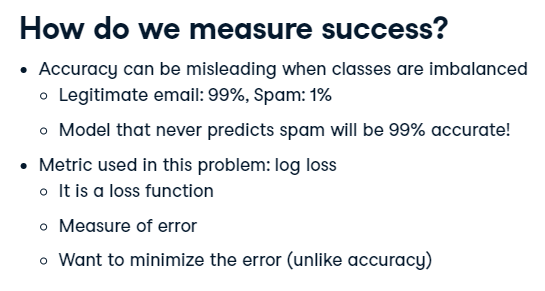

In [ ]:
# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 


### Multiclass logistic regression
Siempre es mejor empezar con modelos simples y llevar lo mas rapido posible
la data normal a predicciones.<br>
Este es un modelo que trata a todas las columna como independientes, ademas en este modelo todas las variables<br>
funcionan como test y prediccion 

In [ ]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
# MULTILABEL_TRAIN_TEST_SPLIT es la funciona que hace el modelo
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info())

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create the DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train,y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

predict_proba es una mejor alternativa a predict porque es menos penalizado por el log loss.

In [ ]:
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit it to the training data
clf.fit(X_train, y_train)

# Load the holdout data: holdout
holdout = pd.read_csv('HoldoutData.csv', index_col=0)

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

In [ ]:
# Generando csv con predicciones
# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             index=holdout.index,
                             data=predictions)


# Save prediction_df to csv
prediction_df.to_csv('predictions.csv')

# Submit the predictions for scoring: score
score = score_submission(pred_path='predictions.csv')

# Print score
print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

## Introduction to Natural Language Proccessing (NLP)
Tokenizacion es el proceso de partir un string en pedazos<br>
Bag of words es contar cuantas veces se repite una palabra<br>
sin embargo se pierde informacion sobre el orden<br>
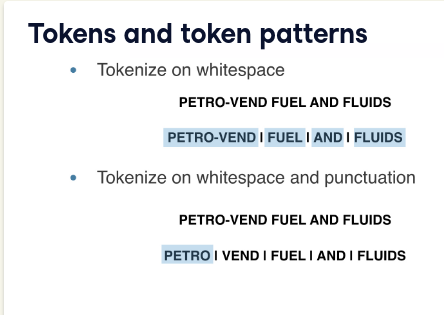

Por el problema del orden es mas interesante entonces aplicar<br>
grams que es como que agarrar pedazos de distintos tamanos<br>
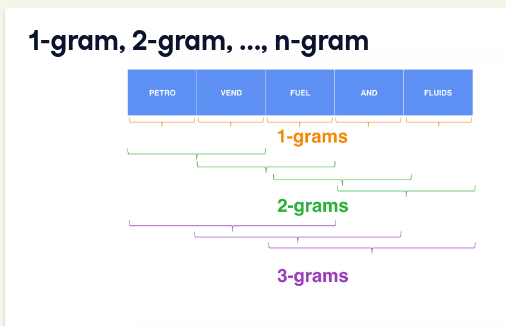

### Representing text as numbers

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)

# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])

## Que es un pipeline?
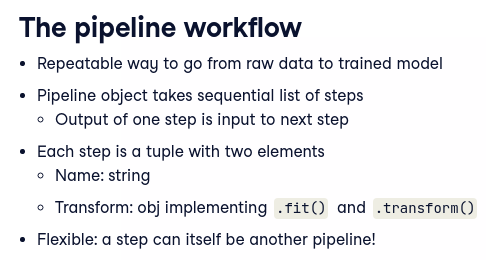

In [ ]:
# Contruyendo pipeline, agregandole datos y testeando datos
# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Split and select numeric data only, no nans 
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)

El mismo ejercicio agregando imputer que es una funcion que llena los NaN<br>
con la media de cada columna

In [ ]:
# Import the Imputer object
from sklearn.preprocessing import Imputer

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Insantiate Pipeline object: pl
pl = Pipeline([
        ('imp', Imputer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train,y_train)

# Compute and print accuracy
accuracy = pl.score(X_test,y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)

## Pipelines with multiple dtypes
Para hacer esto nos apoyamos de FunctionTransformer que convierte una funcion en un objeto que sklearn puede entender<br>
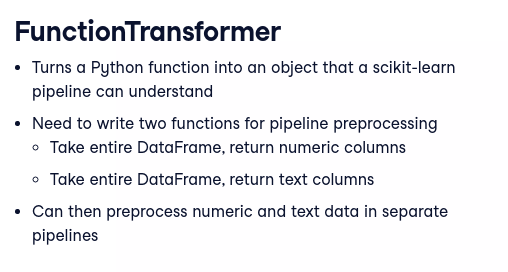

In [ ]:
# Primero se hace una pipeline unicamente con las columnas de texto
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(sample_df['text'],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)

# Construimos dos funciones para seleccionar las columnas numericas y de texto
# Luego 

# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Finalmente unimos los pipelines

In [ ]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 'text']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])


# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)

# Escogiendo un modelo de clasificacion
casi lo mismo pero con multiples columnas de cada tipo

In [ ]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)


# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train,y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

Tricks

In [ ]:
# Construyendo pipeline de texto

# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the text vector
text_vector = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:10])

### Stats trick
Sparse interactions functions helps to add interactions between variables

In [ ]:
# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Computation trick
Hashing trick using hashinvectorizers

In [ ]:
# Import HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

In [ ]:
# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern= TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

### Formulating and simulating hypotesis
La tecnica presentada a continuacion es llamada permutacion que consiste en ver si dos poblaciones son iguales si al ordenarlas aleatoriamente presentan una distribucion simular

In [ ]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2



for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(
                                    rain_june, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

### Generating permutation replicates

# P-value
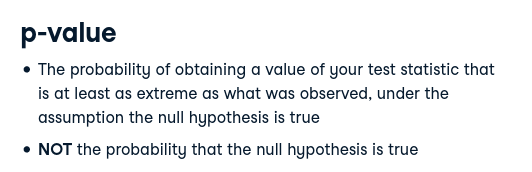

# Boostrap hypothesis
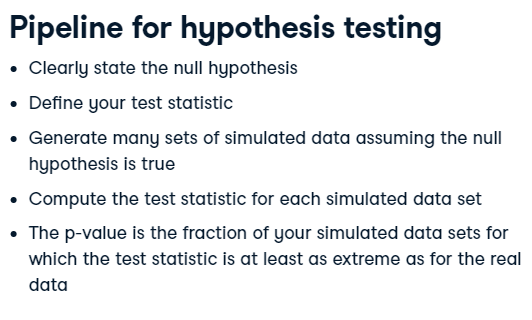

# CLUSTERS

In [ ]:
# Cluster basico
# df solamente contiene las columnas llamadas x and y

# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()



### Preprocessing for clustering
Antes de empezar a aplicar este algoritmo es indispensable aplicar una normalizacion puesto que los datos pueden estar a distintas escalas,<br>
el cual es un proceso donde nosotros reescalamos los datos con respecto a la desviacion estandard que da como resultado una desviacion estandard de 1<br>

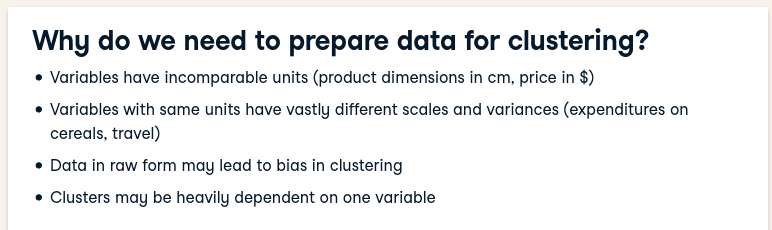

In [ ]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

# Ejemplo claro de como funciona con valores pequenos

# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

## Hierarchical clustering
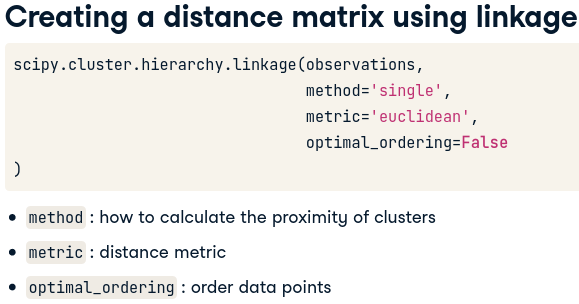<br>
Es importante decir que no hay metodo correcto para todas las circunstancias y primero habria que estudiar la distribucion de los datos<>
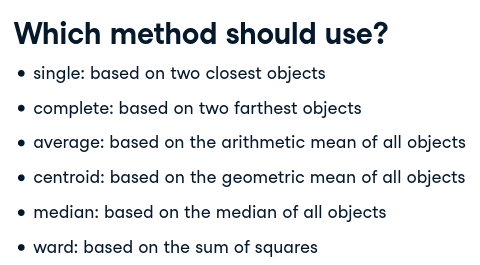

In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

El mejor metodo para visualizarlas seria seaborn

In [ ]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data=comic_con)
plt.show()

## Dendogram

In [ ]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

In [ ]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

## Kmeans
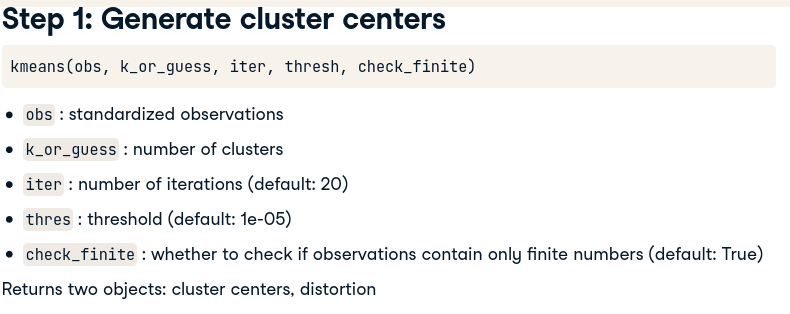

In [ ]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Determinando numero de clusters
Elbow plot, average siloutee and gap statistic

In [ ]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()



Algo interesante para ver si tus clusters estan bien formados es cambiar el seed, si estos no cambian mucho al cambiar el seed significa que estan bien hechos<br>
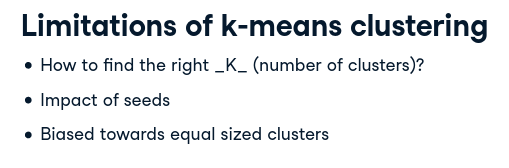

In [ ]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1,2,1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [ ]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

## Applying clusters to images

In [ ]:
# Primero obtenemos la imagen y metemos sus valores en sus distintas escalas de
# colores en listas

# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

# Hacemos elbow plot
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_blue','scaled_green']],i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

# Normalizamos los datos y graficamos
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

## Clustering multiple features
Techniques to reduce features: Factor analysis y multidimensional scalling<br>
Se puede chequear que las medias de los grupos sean relativamente similares, que tengan un tamano decente comparado con los otros grupos y graficar<br>

In [ ]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

# Matplotlib like a pro

In [ ]:
# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b',marker='o',linestyle="--")

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r',marker='v',linestyle="--")

# Call show to display the resulting plot
plt.show()


ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# Customize the x-axis label
ax.set_xlabel("Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title("Weather patterns in Austin and Seattle")

# Display the figure
plt.show()

# Subplots

In [ ]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2 , 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

# Time series data

In [ ]:
# Import pandas as pd
import pandas as pd

# Read the data from file using read_csv
# Leemos la columna como columna de fechas y la volvemos indices
climate_change = pd.read_csv('climate_change.csv', parse_dates = ["date"], index_col = "date")


import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
# Observese que se usa el index en el eje X
ax.plot(climate_change.index, climate_change["relative_temp"])

# Set the x-axis label
ax.set_xlabel("Time")

# Set the y-axis label
ax.set_ylabel("Relative temperature (Celsius)")

# Show the figure
plt.show()

In [ ]:
# Este ejemplo es interesante porque hace un filtro con la columna de la fecha que tambien es el index
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

In [ ]:
# Creando una grafica con dos lineas y dos distintas escalas en el eje Y
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change["co2"], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change["relative_temp"], color='red')

plt.show()

### Anotations to plot

In [ ]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change["relative_temp"])

# Annotate the date at which temperatures exceeded 1 degree
# Se crea el texto de la notacion
ax.annotate('>1 degree', (pd.Timestamp('2015-10-06'), 1))

plt.show()

In [ ]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Anotacion con flecha
# Annotate the point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

In [ ]:
# Rotar labels en eje
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals["Gold"])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation = 90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()

Stacked bar plot

In [ ]:
# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals["Gold"], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver")

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"]+medals["Silver"], label="Bronze")

# Display the legend
ax.legend()

plt.show()

Histograma cool con dos distribuciones

In [ ]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"], histtype='step', label="Rowing", bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"], histtype='step', label="Gymnastics", bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

Boxplot

In [ ]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

# Share plots with others
Cambiar estilo de graficas, link para ver los estilos <br>
https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html<br>
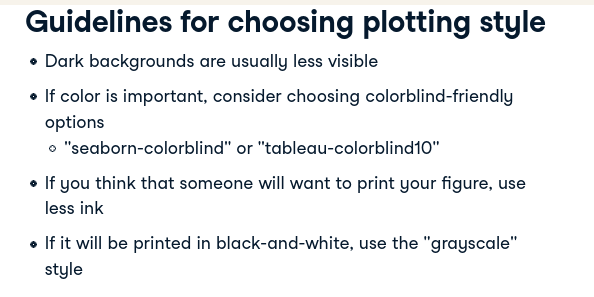

In [ ]:
# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use("Solarize_Light2")
fig, ax = plt.subplots()
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

Guardando imagenes, hemos de notar que podemos cambiar resolucion, tamano, calidad y formato segun nuestra conveniniencia

In [ ]:
# Save as a PNG file
fig.savefig('my_figure.png')

# Cambiar resolucion
# Save as a PNG file with 300 dpi
fig.savefig("my_figure_300dpi.png",dpi = 300)

# Cambiando tamano en pulgadas
# Set figure dimensions and save as a PNG
fig.set_size_inches([3,5])
fig.savefig("figure_3_5.png")

#

Hyphotesis testing<br>
A/B testing ayuda a ver si un cambio en la estrategia tuvo un verdadero impacto